# Two Dimensional Histogram Filter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


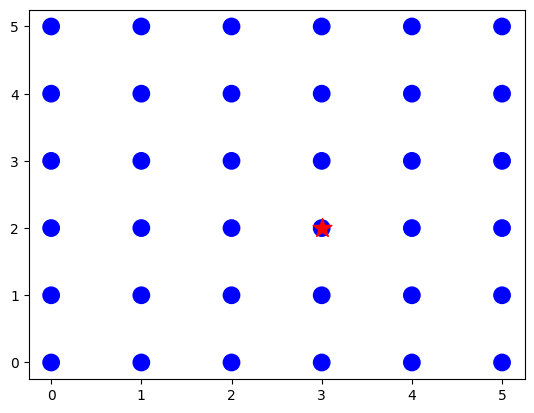

In [23]:
from __future__ import division, print_function
import simulate as sim
import helpers
import localizer

%load_ext autoreload
%autoreload 2

# This code defines a 2d robot world
# It then creates a simulation and shows the initial beliefs


R = 'r'
G = 'g'

grid = [
    [R, G, G, G, R, R],
    [G, G, R, G, R, G],
    [G, R, G, G, G, G],
    [R, R, G, R, G, R], 
    [R, G, R, G, R, R],
    [R, R, R, G, G, R]
]

blur = 0.05
p_hit = 200
simulation = sim.Simulation(grid, blur, p_hit)
simulation.show_beliefs()


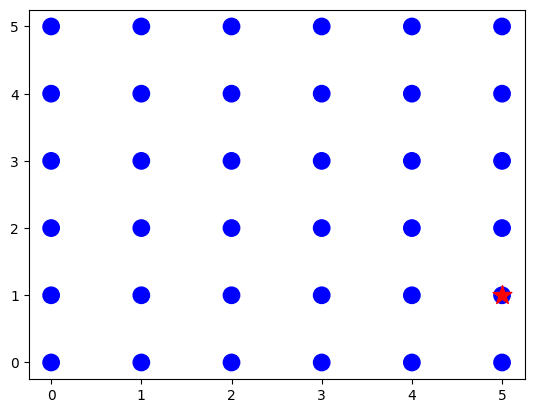

In [56]:
import random
dx = random.choice([-1, 0, 0, 1])
dy = (1-abs(dx)) * random.choice([-1, 1])
simulation.move(dx, dy)
simulation.show_beliefs()

In [59]:
# Open localizer.py and complete the sense function.
# Run the code in the cell below to import the localizer module (or reload it) and then test sense function.
# If the test passes, you've successfully implemented your first feature! 
# Keep going with the project. If your tests don't pass (they likely won't the first few times you test), 
# keep making modifications to the sense function until they do!

def test_sense():
    R = 'r'
    _ = 'g'

    simple_grid = [
        [_,_,_],
        [_,R,_],
        [_,_,_]
    ]

    p = 1.0 / 9
    initial_beliefs = [
        [p,p,p],
        [p,p,p],
        [p,p,p]
    ]

    observation = R

    expected_beliefs_after = [
        [1/11, 1/11, 1/11],
        [1/11, 3/11, 1/11],
        [1/11, 1/11, 1/11]
    ]

    p_hit  = 3.0
    p_miss = 1.0
    
    beliefs_after_sensing = localizer.sense(
        observation, simple_grid, initial_beliefs, p_hit, p_miss)

    if helpers.close_enough(beliefs_after_sensing, expected_beliefs_after):
        print("Tests pass! Your sense function is working as expected")
        return
    
    elif not isinstance(beliefs_after_sensing, list):
        print("Your sense function doesn't return a list!")
        return
        
    elif len(beliefs_after_sensing) != len(expected_beliefs_after):
        print("Dimensionality error! Incorrect height")
        return
              
    elif len(beliefs_after_sensing[0] ) != len(expected_beliefs_after[0]):
        print("Dimensionality Error! Incorrect width")
        return
    
    elif beliefs_after_sensing == initial_beliefs:
        print("Your code returns the initial beliefs.")
        return
        
    total_probability = 0.0
    for row in beliefs_after_sensing:
        for p in row:
            total_probability += p
    if abs(total_probability-1.0) > 0.001:
        
        print("Your beliefs appear to not be normalized")
        return
    
    print("Something isn't quite right with your sense function")

test_sense()

Tests pass! Your sense function is working as expected


#  Identify and Reproduce a Bug

The user said that rectangular environments seem to be causing the bug.
- The code below is the same as the code you were working with when you were doing integration testing of your new feature. 
- See if you can modify it to reproduce the bug.

## Write a test that reproduces the Bug

In [1]:
# According to the user, sometimes the robot actually does run "for a while" 
#
# How many times do we need to call simulation.run() to consistently
#  reproduce the bug?
#  Try 1000 times 

def test_robot_works_in_rectangle_world():
    from simulate import Simulation
    import simulate as sim
    import helpers

    R = 'r'
    G = 'g'

    grid = [ 
        [R,G,G,G,R,R,R],
        [G,G,R,G,R,G,R],
        [G,R,G,G,G,G,R],
        [R,R,G,R,G,G,G],
    ]

    blur = 0.001
    p_hit = 100.0
    for i in range(1000):
        simulation = sim.Simulation(grid, blur, p_hit)
        simulation.run(1)
    
test_robot_works_in_rectangle_world()